Desenvolvimento do modelo de Machine Learning:

Primeiramente, incluí bibliotecas como o Pandas e o Numpy para importar modelos e poder filtrá-los. Então, carreguei em df o arquivo 'train.csv' que vem com algumas informações sobre os passageiros que se envolveram no naufrágio:

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/raw/train.csv")

df.head()

Análise inicial: Aqui usei colunas disponíveis para poder fazer algumas visualizações básicas de dados, como os valores dos dados, algumas estatísticas sobre eles (como média, desvios, etc) e uma contagem básica da quantidade de sobreviventes totais do naufrágio.

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Survived'].value_counts()

Aqui foi feita uma limpeza e um pré-processamento dos dados para simplificar o modelo, usando as informações mas importantes e transformado os valores 'masculino' e 'feminino' da coluna Sexo para 0 ou 1.

In [ ]:
dados = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()
dados['Sex'] = dados['Sex'].map({'male': 0, 'female': 1})
dados.head()

Para a escolha do modelo, usei o de Regressão logística, que pareceu ser o mais apropriado visto que é mais eficiente para classificação binária - isso é, se alguém sobrevive ou não, encontrando as melhores combinações para prever a sobrevivência dos passageiros com base nos dados de treino.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = dados[['Pclass', 'Sex', 'Age', 'Fare']]
y = dados['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

modelo = LogisticRegression()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

print("Acurácia: ", accuracy_score(y_test, y_pred))

Acurácia:  0.7552447552447552


Por meio do modelo de Regressão Logística e utilização das colunas mais importantes, conseguimos uma acurácia de 75.52% para prever os sobreviventes do Titanic!

Agora, para a visualização de gráficos usando Seaborn e Pyplot:

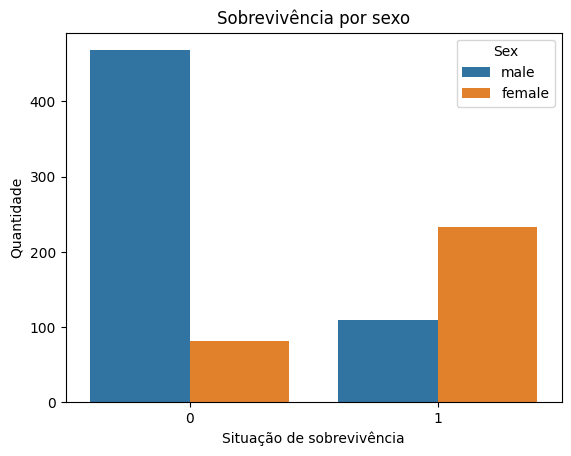

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Sobreviveu_Label'] = df['Survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})

sns.countplot(x = 'Survived', hue = 'Sex', data = df)

plt.title('Sobrevivência por sexo')
plt.xlabel('Situação de sobrevivência')
plt.ylabel('Quantidade')
plt.show()

Aqui está um exemplo de um gráfico gerado pelo código, Onde 